In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

from scipy.special import inv_boxcox


_ = -0.24827048987665554

def inverse_box(pred,test,l):
    results_pred = inv_boxcox(pred,l)
    results_test = inv_boxcox(test,l) 
    print("    Y_TEST            Y_RESULTS_PRED ")
    print("_______________________________________")
    for i in range(50):
        print(results_test[i], ": " ,results_pred[i])


In [4]:
data=pd.read_csv('./Ordinal_Encoding.csv')

In [5]:
# data['weekend_or_daily'] = data['day_of_week'].apply(lambda x: 0 if x < 5 else 1)

In [6]:
data.drop(['price_unskewed_sqrt','price_unskewed','price'], axis=1, inplace=True) #keep only the price_unskewed_boxcox

In [7]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

In [8]:
# X = data.values[:,0:-1]
X = data.drop(columns=['price_unskewed_boxcox']).values
y = data.values[:,-1]

In [ ]:
#### FIRST FIND THE BEST PARAMETERS####
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# Assuming X contains the features 'class', 'duration', 'days_left' and y contains the target variable 'price_unskewed_boxcox'
# Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# n_est_val = [50,100,150,200,300,400]
# for n in n_est_val:

#     param_grid = {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['auto', 'sqrt', 'log2']
#     }


#     grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#     # Fit GridSearchCV to data
#     grid_search.fit(X_train, y_train)

#     # Print the best parameters
#     print("Best Parameters:", grid_search.best_params_)

#     # Get the best model
#     best_rf_regressor = grid_search.best_estimator_

#     # Evaluate the best model on the test set
#     y_pred = best_rf_regressor.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     print("Test MSE:", mse)

#### FIRST FIND THE BEST PARAMETERS####

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Assuming X contains the features 'class', 'duration', 'days_left' and y contains the target variable 'price_unskewed_boxcox'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=0,max_depth=None, n_estimators=200,max_features= 'sqrt',min_samples_leaf=1,
                                    min_samples_split=2)


# Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
# 'min_samples_split': 2, 'n_estimators': 200}
# Test MSE: 0.00020228879348226867
# # Fit the model
rf_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = rf_regressor.predict(X_test)

# # Calculate the accuracy of the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse)
# Print the accuracy
print("Mean Squared Error:", rmse_test)


# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }


# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit GridSearchCV to data
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Get the best model
# best_rf_regressor = grid_search.best_estimator_
  
# # Evaluate the best model on the test set
# y_pred = best_rf_regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Test MSE:", mse)



Mean Squared Error: 0.014265047916903783


In [13]:
y_pred_train = rf_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Mean Squared Error:", rmse_train)

Mean Squared Error: 0.005423211623375895


In [14]:
## apo proigoumenoa rxeio apou dimiourgousa 
##feature data['price_unskewed_boxcox'], _ = boxcox(data['price']) xreiazomai '_'=λ gia inv_boxcox()
# _ = -0.24827048987665554 

inverse_box(y_pred,y_test,_)

    Y_TEST            Y_RESULTS_PRED 
_______________________________________
41314.00000000004 :  41775.250811581034
6295.99999999999 :  6371.695880732551
10604.0 :  12038.780706175598
4796.000000000009 :  4924.650478513915
5955.000000000005 :  7444.979487443427
4873.000000000001 :  4617.022124195852
5231.999999999997 :  5067.206676775321
60396.00000000016 :  60411.99930373452
69243.99999999962 :  70193.94680059518
6074.9999999999945 :  6087.695239012546
2049.999999999999 :  2183.369447165072
4452.999999999995 :  4620.523807794813
6314.99999999999 :  6202.978083578564
84153.99999999987 :  62893.133018041335
3013.000000000004 :  2506.967145438888
64831.000000000124 :  63156.055015747865
1714.0000000000005 :  1833.164033740864
6218.9999999999945 :  5822.042239320005
7489.000000000004 :  9229.242822791535
51817.00000000012 :  51856.972941329404
6600.0000000000355 :  7070.604781785523
5604.999999999991 :  6054.391190651582
62523.99999999985 :  61863.09055619799
3867.000000000007 :  3776.0

In [15]:
results_pred = inv_boxcox(y_pred,_)
results_test = inv_boxcox(y_test,_) 

mse = mean_squared_error(results_test, results_pred)

rmse = np.sqrt(mse)
# target_range = np.max(results_pred) - np.min(results_pred)
# percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy_2 = (1.0 - (rmse / len(results_pred))) * 100
percentage_accuracy_2

95.67634549208105

In [20]:
from sklearn.metrics import r2_score


# Calculate R-squared
r_squared = r2_score(results_test, results_pred)
print("R-squared:", r_squared)

R-squared: 0.9870124596373975


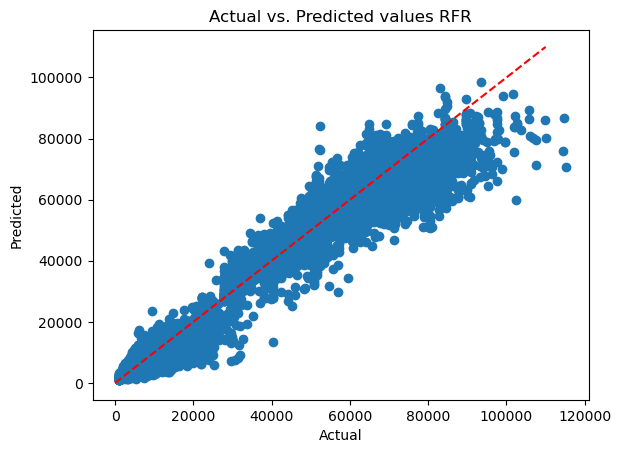

In [18]:

# Scatter plot of actual vs. predicted values
plt.scatter(results_test, results_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values RFR")

# Plot the line x = y
x_values = range(110001)
# Plot the line y = x
plt.plot(x_values, x_values, color='red',linestyle='--' ,label='y = x')
plt.show()


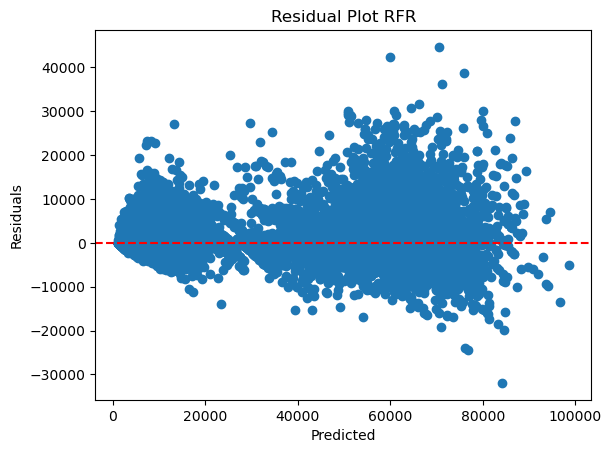

In [17]:
# Residual plot
residuals = results_test - results_pred
plt.scatter(results_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot RFR")
plt.show()


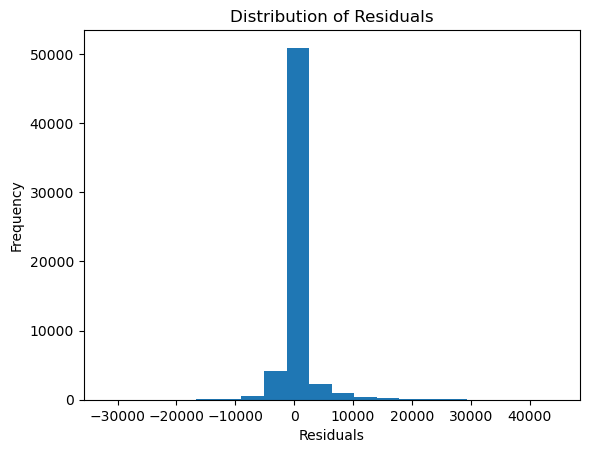

In [13]:
# Distribution of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


C:\Users\haris\AppData\Local\Temp\ipykernel_11124\3255715463.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_real_test, label='Actual', shade=True)
C:\Users\haris\AppData\Local\Temp\ipykernel_11124\3255715463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_real_pred, label='Predicted', shade=True)


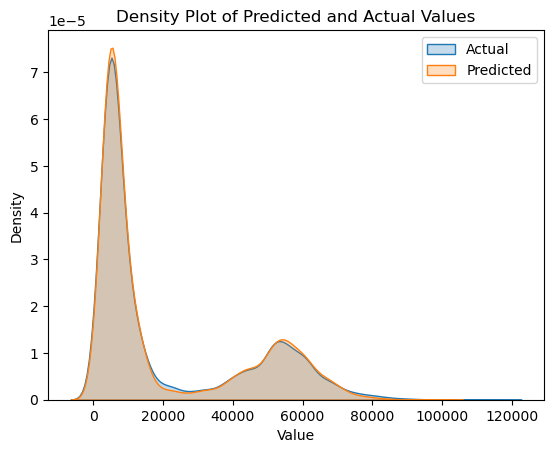

In [14]:
# Density Plot of Predicted and Actual Values
sns.kdeplot(y_real_test, label='Actual', shade=True)
sns.kdeplot(y_real_pred, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Predicted and Actual Values')
plt.legend()
plt.show()


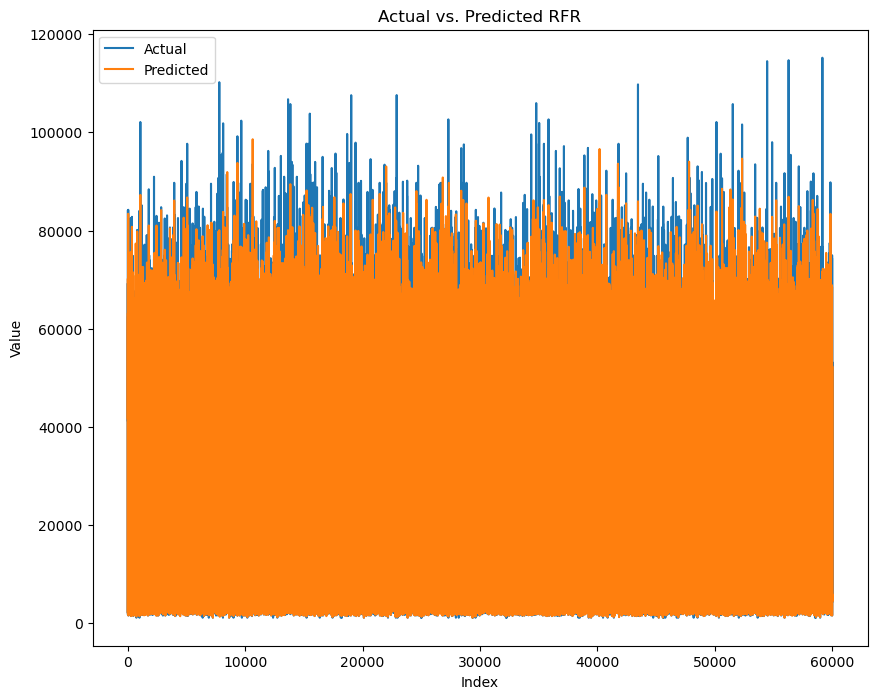

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(results_test, label='Actual')
plt.plot(results_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted RFR')
plt.legend()
plt.show()